<a href="https://colab.research.google.com/github/gKorada/MLPractice/blob/main/Spark_GraphFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necessary libraries and Intitializing the environment

In [ ]:
#Installing the necessary libraries
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://bitbucket.org/habedi/datasets/raw/b6769c4664e7ff68b001e2f43bc517888cbe3642/spark/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!rm -rf spark-3.0.2-bin-hadoop2.7.tgz*
!pip -q install findspark pyspark graphframes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.0 MB/s eta 0:00:00


In [ ]:
#Initializing the environment
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"

In [ ]:
from graphframes import *
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('myfunction').getOrCreate()

# Creating edges and vertices in Spark Graph Frame.


In [ ]:
#It is important to have column named "id" in the first csv file
# and (src,dst) in the second csv file.
# The Graph will not get created if these 3 columns are missing
#The other columns can have any names and the data can have any number of columns with any informationb
#Example : Not necessary to have the name of column as "relation"
#if graph frame is related to products (raw material and fininshed product)
#The GraphFrame function accepts argument in the form of two csv files.
#The name of the argument should be vertices and edges only, else it is an error.
vertices = spark.read.option('header', 'true').csv('Nodes.csv')
edges = spark.read.option('header', 'true').csv('Edges.csv')

In [ ]:
#Displaying the vertices and edges
vertices.show(5)
edges.show(5)

+---+------+---+------+----------+
| id|  Name|Age|Gender|     State|
+---+------+---+------+----------+
|  1|Wilson| 31|  Male|  New York|
|  2| David| 16|  Male|California|
|  3| James| 31|  Male|  New York|
|  4|  Mary| 29|Female|California|
|  5| Smith| 53|  Male|  New York|
+---+------+---+------+----------+
only showing top 5 rows

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1|  2|  follow|
|  1|  5|  friend|
|  1|  7|  follow|
|  1|  8|     son|
|  3|  9|     son|
+---+---+--------+
only showing top 5 rows



# Creating a GraphFrame of vertices and edges

In [ ]:
#Creating a graph of vertices and edges
mygraph = GraphFrame(vertices, edges)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


## Vertices and Edges

In [ ]:
#Displaying the vertices of graph
mygraph.vertices.show()

infovertices=mygraph.vertices.collect()
for i in range(3):
    print(infovertices[i])
    print(infovertices[i]['Name'], "stays in", infovertices[i]['State'] )

+---+------+---+------+----------+
| id|  Name|Age|Gender|     State|
+---+------+---+------+----------+
|  1|Wilson| 31|  Male|  New York|
|  2| David| 16|  Male|California|
|  3| James| 31|  Male|  New York|
|  4|  Mary| 29|Female|California|
|  5| Smith| 53|  Male|  New York|
|  6|Sheena| 27|Female|  New York|
|  7|  Rosy| 38|Female|California|
|  8|  Luna| 53|Female|  New York|
|  9|George| 53|  Male|  New York|
| 10| Miara| 51|Female|California|
| 11| Peter| 28|  Male|  New York|
| 12|  Gary| 31|  Male|California|
| 13|  Emma| 32|Female|  New York|
| 14| Clara| 30|Female|  New York|
| 15| Henry| 35|  Male|California|
+---+------+---+------+----------+

Row(id='1', Name='Wilson', Age='31', Gender='Male', State='New York')
Wilson stays in New York
Row(id='2', Name='David', Age='16', Gender='Male', State='California')
David stays in California
Row(id='3', Name='James', Age='31', Gender='Male', State='New York')
James stays in New York


In [ ]:
#Displaying the edges of graph
mygraph.edges.show(5)

infoedges=mygraph.edges.collect()
for i in range(3):
    print(infoedges[i])
    print(infoedges[i]['src'],infoedges[i]['relation'], infoedges[i]['dst'])

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1|  2|  follow|
|  1|  5|  friend|
|  1|  7|  follow|
|  1|  8|     son|
|  3|  9|     son|
+---+---+--------+
only showing top 5 rows

Row(src='1', dst='2', relation='follow')
1 follow 2
Row(src='1', dst='5', relation='friend')
1 friend 5
Row(src='1', dst='7', relation='follow')
1 follow 7


# Triplets

In [ ]:
#Displaying triplets
mygraph.triplets.show(5)

triplet=mygraph.triplets.collect()
print("Displaying the Triplets:")
for i in range(3):
    print(triplet[i])

#Displaying required information from triplets
print("Extracting required information from Triplets:")
for i in range(5):
    print(triplet[i].src['Name'], triplet[i].edge['relation'], triplet[i].dst['Name'])




+--------------------+----------------+--------------------+
|                 src|            edge|                 dst|
+--------------------+----------------+--------------------+
|{1, Wilson, 31, M...| {1, 14, follow}|{14, Clara, 30, F...|
|{1, Wilson, 31, M...|{1, 15, brother}|{15, Henry, 35, M...|
|{1, Wilson, 31, M...|     {1, 8, son}|{8, Luna, 53, Fem...|
|{1, Wilson, 31, M...|  {1, 7, follow}|{7, Rosy, 38, Fem...|
|{1, Wilson, 31, M...|  {1, 5, friend}|{5, Smith, 53, Ma...|
+--------------------+----------------+--------------------+
only showing top 5 rows

Displaying the Triplets:
Row(src=Row(id='1', Name='Wilson', Age='31', Gender='Male', State='New York'), edge=Row(src='1', dst='14', relation='follow'), dst=Row(id='14', Name='Clara', Age='30', Gender='Female', State='New York'))
Row(src=Row(id='1', Name='Wilson', Age='31', Gender='Male', State='New York'), edge=Row(src='1', dst='15', relation='brother'), dst=Row(id='15', Name='Henry', Age='35', Gender='Male', State='Califo

# Determining the shortest path

In [ ]:
#Determining the shortest path
mygraph.shortestPaths(landmarks=["7"]).show()

+---+------+---+------+----------+---------+
| id|  Name|Age|Gender|     State|distances|
+---+------+---+------+----------+---------+
|  8|  Luna| 53|Female|  New York|       {}|
|  4|  Mary| 29|Female|California| {7 -> 1}|
|  6|Sheena| 27|Female|  New York|       {}|
| 12|  Gary| 31|  Male|California| {7 -> 2}|
| 11| Peter| 28|  Male|  New York|       {}|
| 10| Miara| 51|Female|California|       {}|
|  5| Smith| 53|  Male|  New York| {7 -> 2}|
| 13|  Emma| 32|Female|  New York|       {}|
| 14| Clara| 30|Female|  New York|       {}|
|  3| James| 31|  Male|  New York|       {}|
| 15| Henry| 35|  Male|California|       {}|
|  9|George| 53|  Male|  New York|       {}|
|  1|Wilson| 31|  Male|  New York| {7 -> 1}|
|  7|  Rosy| 38|Female|California| {7 -> 0}|
|  2| David| 16|  Male|California| {7 -> 1}|
+---+------+---+------+----------+---------+



# Displaying the degrees (OutDegree + InDegree), outdegree and indegrees

In [ ]:
#Displaying the users and number of out-Degrees
mygraph.outDegrees.show(4)

#Displaying top-5 users having maximum out-Degrees
mygraph.outDegrees.orderBy(['outDegree'], ascending = [False]).show(5)

#Displaying bottom-3 users having minimum out-Degrees
mygraph.outDegrees.orderBy(['outDegree'], ascending = [True]).show(5)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+---------+
| id|outDegree|
+---+---------+
|  7|        1|
|  3|        2|
|  5|        2|
|  6|        2|
+---+---------+
only showing top 4 rows

+---+---------+
| id|outDegree|
+---+---------+
|  1|        6|
|  2|        3|
|  3|        2|
|  5|        2|
|  6|        2|
+---+---------+
only showing top 5 rows

+---+---------+
| id|outDegree|
+---+---------+
|  7|        1|
| 12|        1|
|  3|        2|
|  5|        2|
|  6|        2|
+---+---------+
only showing top 5 rows



In [ ]:
#Displaying the users and number of in-Degrees
mygraph.inDegrees.show(4)

#Displaying top-5 users having maximum in-Degrees
mygraph.inDegrees.orderBy(['inDegree'], ascending = [False]).show(5)

#Displaying bottom-3 users having minimum in-Degrees
mygraph.inDegrees.orderBy(['inDegree'], ascending = [True]).show(3)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+--------+
| id|inDegree|
+---+--------+
|  7|       3|
| 15|       2|
| 11|       2|
|  3|       1|
+---+--------+
only showing top 4 rows

+---+--------+
| id|inDegree|
+---+--------+
|  7|       3|
| 14|       3|
| 15|       2|
| 11|       2|
|  9|       2|
+---+--------+
only showing top 5 rows

+---+--------+
| id|inDegree|
+---+--------+
|  8|       1|
|  3|       1|
|  5|       1|
+---+--------+
only showing top 3 rows



In [ ]:
#Displaying the number of degrees (out degree + in degree)
mygraph.degrees.show(4)

#Displaying top-5 users having maximum Degrees
mygraph.degrees.orderBy(['Degree'], ascending = [False]).show(5)

#Displaying bottom-3 users having minimum Degrees
mygraph.degrees.orderBy(['Degree'], ascending = [True]).show(3)

+---+------+
| id|degree|
+---+------+
|  7|     4|
| 15|     2|
| 11|     2|
|  3|     3|
+---+------+
only showing top 4 rows

+---+------+
| id|degree|
+---+------+
|  1|     6|
|  7|     4|
|  2|     4|
|  4|     4|
|  3|     3|
+---+------+
only showing top 5 rows

+---+------+
| id|degree|
+---+------+
|  8|     1|
| 12|     1|
|  9|     2|
+---+------+
only showing top 3 rows



# Filtering the vertices and edges

In [ ]:
#Filtering the vertices
#Displaying vertices and edges of selected vertices(Male users staying in california)
result=mygraph.filterVertices("Gender=='Male' and State=='California'");
result.vertices.show()
result.edges.show()
#Displaying degrees related to the male users staying in california
result.degrees.show()
result.inDegrees.show()
result.outDegrees.show()

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+-----+---+------+----------+
| id| Name|Age|Gender|     State|
+---+-----+---+------+----------+
|  2|David| 16|  Male|California|
| 12| Gary| 31|  Male|California|
| 15|Henry| 35|  Male|California|
+---+-----+---+------+----------+

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  2| 15|  follow|
+---+---+--------+

+---+------+
| id|degree|
+---+------+
| 15|     1|
|  2|     1|
+---+------+

+---+--------+
| id|inDegree|
+---+--------+
| 15|       1|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  2|        1|
+---+---------+



In [ ]:
#Filtering the edges
#Filtering edges and displaying informaion related to "friend" relation
result2=mygraph.filterEdges("relation='friend'");
result2.vertices.show()
result2.edges.show()
#Displaying degrees related to "friend" relation
result2.degrees.show()
result2.inDegrees.show()
result2.outDegrees.show()


/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+------+---+------+----------+
| id|  Name|Age|Gender|     State|
+---+------+---+------+----------+
|  1|Wilson| 31|  Male|  New York|
|  2| David| 16|  Male|California|
|  3| James| 31|  Male|  New York|
|  4|  Mary| 29|Female|California|
|  5| Smith| 53|  Male|  New York|
|  6|Sheena| 27|Female|  New York|
|  7|  Rosy| 38|Female|California|
|  8|  Luna| 53|Female|  New York|
|  9|George| 53|  Male|  New York|
| 10| Miara| 51|Female|California|
| 11| Peter| 28|  Male|  New York|
| 12|  Gary| 31|  Male|California|
| 13|  Emma| 32|Female|  New York|
| 14| Clara| 30|Female|  New York|
| 15| Henry| 35|  Male|California|
+---+------+---+------+----------+

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1|  5|  friend|
|  2| 14|  friend|
|  3|  6|  friend|
+---+---+--------+

+---+------+
| id|degree|
+---+------+
|  3|     1|
|  5|     1|
|  6|     1|
|  1|     1|
| 14|     1|
|  2|     1|
+---+------+

+---+--------+
| id|inDegree|
+---+--------+
|  5|       1|
|  6|    

In [ ]:
#Filtering both vertices and edges
#Displaying "friend" relation and both vertices should be "Male"
result3=mygraph.filterEdges("relation='friend'").filterVertices("Gender='Male'");
result3.vertices.show()
result3.edges.show()
#Displaying degrees related to the friend relation and male users
result3.degrees.show()
result3.inDegrees.show()
result3.outDegrees.show()

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+------+---+------+----------+
| id|  Name|Age|Gender|     State|
+---+------+---+------+----------+
|  1|Wilson| 31|  Male|  New York|
|  2| David| 16|  Male|California|
|  3| James| 31|  Male|  New York|
|  5| Smith| 53|  Male|  New York|
|  9|George| 53|  Male|  New York|
| 11| Peter| 28|  Male|  New York|
| 12|  Gary| 31|  Male|California|
| 15| Henry| 35|  Male|California|
+---+------+---+------+----------+

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1|  5|  friend|
+---+---+--------+

+---+------+
| id|degree|
+---+------+
|  5|     1|
|  1|     1|
+---+------+

+---+--------+
| id|inDegree|
+---+--------+
|  5|       1|
+---+--------+

+---+---------+
| id|outDegree|
+---+---------+
|  1|        1|
+---+---------+



In [ ]:
#Practical Exercise: Display degrees, out degree and in degree related to the male users staying in New York
#and relation is "son"


# Removing Non-active Vertices

In [ ]:
#Removing vertices that are not active
result=mygraph.dropIsolatedVertices()
result.vertices.show()

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+------+---+------+----------+
| id|  Name|Age|Gender|     State|
+---+------+---+------+----------+
|  1|Wilson| 31|  Male|  New York|
|  2| David| 16|  Male|California|
|  3| James| 31|  Male|  New York|
|  4|  Mary| 29|Female|California|
|  5| Smith| 53|  Male|  New York|
|  6|Sheena| 27|Female|  New York|
|  7|  Rosy| 38|Female|California|
|  8|  Luna| 53|Female|  New York|
|  9|George| 53|  Male|  New York|
| 11| Peter| 28|  Male|  New York|
| 12|  Gary| 31|  Male|California|
| 14| Clara| 30|Female|  New York|
| 15| Henry| 35|  Male|California|
+---+------+---+------+----------+



# [Page Rank]

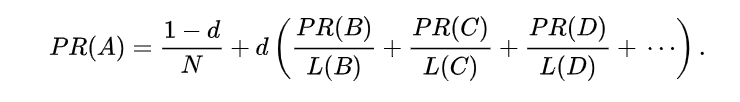

In [ ]:
#The formula for Page Rank is displayed on the top
#The Page Rank algorithm weighs the incoming edges to a vertex and transforms it into a score.
#The idea is that each incoming edge represents an endorsement and makes the vertex more relevant in the given graph.
#For example, in a social network, if a person is followed by various people, he or she will be ranked highly.
#Note: The sum of page rank is equal to the number of vertices. Here, 15.
#Observe the highest rage rank of id-11. id-11 did not had highest number of in-degrees, out-degrees and degrees
#This is because the 11 has relation with 7 and 4
#and page rank of 7 and 4 is more
x=mygraph.pageRank(maxIter=10)
x.vertices.show()


+---+------+---+------+----------+------------------+
| id|  Name|Age|Gender|     State|          pagerank|
+---+------+---+------+----------+------------------+
|  8|  Luna| 53|Female|  New York|0.6669903612136878|
|  4|  Mary| 29|Female|California|1.3642874012489465|
|  6|Sheena| 27|Female|  New York|1.0165971878738898|
| 12|  Gary| 31|  Male|California|0.5842251339097996|
| 11| Peter| 28|  Male|  New York| 2.384471422165715|
| 10| Miara| 51|Female|California|0.5842251339097996|
|  5| Smith| 53|  Male|  New York|0.6669903612136878|
| 13|  Emma| 32|Female|  New York|0.5842251339097996|
| 14| Clara| 30|Female|  New York|1.1394418670733832|
|  3| James| 31|  Male|  New York|1.0165971878738898|
| 15| Henry| 35|  Male|California| 0.855970963557566|
|  9|George| 53|  Male|  New York|1.4489692418379798|
|  1|Wilson| 31|  Male|  New York|0.5842251339097996|
|  7|  Rosy| 38|Female|California|1.4357931090883682|
|  2| David| 16|  Male|California|0.6669903612136878|
+---+------+---+------+-----

# Creating the network diagram


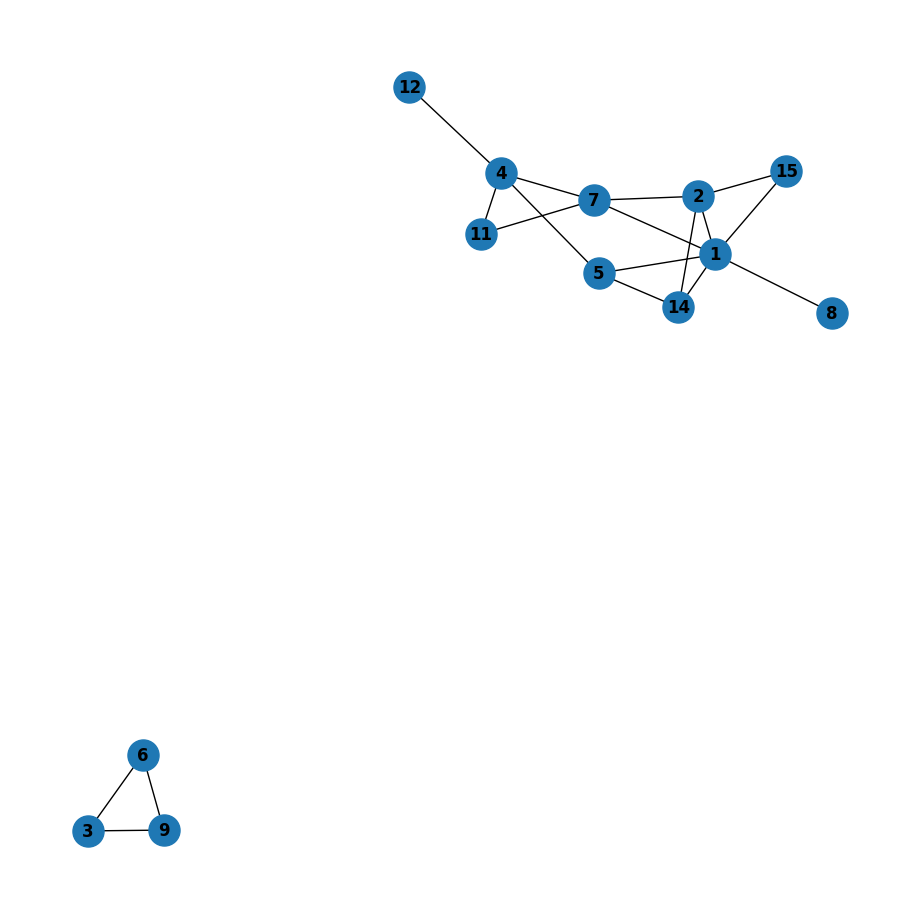

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# the function will plot the source and destination nodes and connect them by meand of undirected line
def plot_undirected_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(1000):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot, with_labels=True, font_weight="bold", node_size=500)
plot_undirected_graph(mygraph.edges)

# Triangle Count: Refer to the diagram below for counting the number of traingles for each count

In [ ]:
#Triangle counting is commonly used as community detection and counting in a social network graph.
#A triangle is a set of three vertices, where each vertex has a relationship to the other two vertices in the triangle.
#In a social network community, it’s easy to find a considerable number of triangles connected to each other.


mygraph.triangleCount().show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-----+---+------+---+------+----------+
|count| id|  Name|Age|Gender|     State|
+-----+---+------+---+------+----------+
|    2|  7|  Rosy| 38|Female|California|
|    1| 15| Henry| 35|  Male|California|
|    1| 11| Peter| 28|  Male|  New York|
|    1|  3| James| 31|  Male|  New York|
|    0|  8|  Luna| 53|Female|  New York|
|    1|  5| Smith| 53|  Male|  New York|
|    1|  6|Sheena| 27|Female|  New York|
|    1|  9|George| 53|  Male|  New York|
|    4|  1|Wilson| 31|  Male|  New York|
|    0| 10| Miara| 51|Female|California|
|    1|  4|  Mary| 29|Female|California|
|    0| 12|  Gary| 31|  Male|California|
|    0| 13|  Emma| 32|Female|  New York|
|    2| 14| Clara| 30|Female|  New York|
|    3|  2| David| 16|  Male|California|
+-----+---+------+---+------+----------+



In [ ]:
#Practical Exercise: Display the triangle count for users staying in New York


